In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
# imports

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imshow
import sys, os
from glob import glob
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, UpSampling2D, concatenate, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet

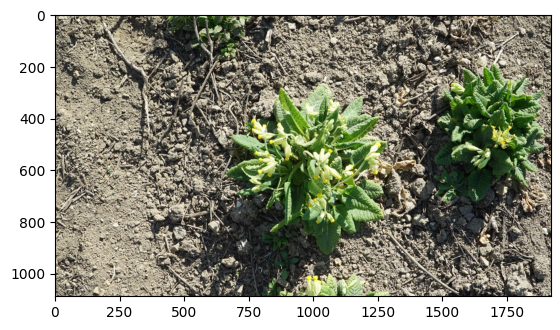

In [3]:
imshow(image.load_img('../Data/CropAndWeed/images/ave-0035-0004.jpg'))

In [4]:
data = {}
DATASET_PATH = '../Data/CropAndWeed/'

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\images'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['image_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'image_path': os.path.join(os.path.normpath(dirpath), filename)}

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\\bboxes'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['bboxes_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'bboxes_path': os.path.join(os.path.normpath(dirpath), filename)}


for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\labelIds\CropAndWeed'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['labelIds_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'labelIds_path': os.path.join(os.path.normpath(dirpath), filename)}

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\params'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['params_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'params_path': os.path.join(os.path.normpath(dirpath), filename)}

print(data['ave-0000-0001'])

{'image_path': '..\\Data\\CropAndWeed\\images\\ave-0000-0001.jpg', 'bboxes_path': '..\\Data\\CropAndWeed\\bboxes\\ave-0000-0001.csv', 'labelIds_path': '..\\Data\\CropAndWeed\\labelIds\\CropAndWeed\\ave-0000-0001.png', 'params_path': '..\\Data\\CropAndWeed\\params\\ave-0000-0001.csv'}


In [69]:
import cv2
import numpy as np
# imshow(image.load_img(data['ave-0045-0011']['labelIds_path']))

mask_Sample = cv2.imread(data['ave-0045-0011']['labelIds_path'])
mask_Sample = mask_Sample.astype(np.uint8)

np.savetxt('./test_mask', mask_Sample[:,:,0])



In [5]:
label_data = {
    0: ('Soil', (0, 0, 0)),
    1: ('Maize', (255, 0, 0)),
    2: ('Maize two-leaf stage', (234, 0, 0)),
    3: ('Maize four-leaf stage', (212, 0, 0)),
    4: ('Maize six-leaf stage', (191, 0, 0)),
    5: ('Maize eight-leaf stage', (170, 0, 0)),
    6: ('Maize max', (149, 0, 0)),
    7: ('Sugar beet', (255, 85, 0)),
    8: ('Sugar beet two-leaf stage', (234, 78, 0)),
    9: ('Sugar beet four-leaf stage', (212, 71, 0)),
    10: ('Sugar beet six-leaf stage', (191, 64, 0)),
    11: ('Sugar beet eight-leaf stage', (170, 57, 0)),
    12: ('Sugar beet Max', (149, 50, 0)),
    13: ('Pea', (255, 170, 0)),
    14: ('Courgette', (255, 255, 0)),
    15: ('Pumpkins', (170, 255, 0)),
    16: ('Radish', (85, 255, 0)),
    17: ('Asparagus', (0, 255, 0)),
    18: ('Potato', (0, 255, 85)),
    19: ('Flat leaf parsley', (0, 255, 170)),
    20: ('Curly leaf parsley', (0, 255, 255)),
    21: ('Cowslip', (0, 170, 255)),
    22: ('Poppy', (0, 85, 255)),
    23: ('Hemp', (0, 0, 255)),
    24: ('Sunflower', (85, 0, 255)),
    25: ('Sage', (170, 0, 255)),
    26: ('Common bean', (255, 0, 255)),
    27: ('Faba bean', (255, 0, 170)),
    28: ('Clover', (255, 0, 85)),
    29: ('Hybrid goosefoot', (255, 188, 178)),
    30: ('Black-bindweed', (255, 207, 178)),
    31: ('Cockspur grass', (255, 226, 178)),
    32: ('Red-root amaranth', (255, 245, 178)),
    33: ('White goosefoot', (245, 255, 178)),
    34: ('Thorn apple', (226, 255, 178)),
    35: ('Potato weed', (207, 255, 178)),
    36: ('German chamomile', (188, 255, 178)),
    37: ('Saltbush', (178, 255, 188)),
    38: ('Creeping thistle', (178, 255, 207)),
    39: ('Field milk thistle', (178, 255, 226)),
    40: ('Purslane', (178, 255, 245)),
    41: ('Black nightshade', (178, 245, 255)),
    42: ('Mercuries', (178, 226, 255)),
    43: ('Spurge', (178, 207, 255)),
    44: ('Pale persicaria', (178, 188, 255)),
    45: ('Geraniums', (188, 178, 255)),
    46: ('Cleavers', (207, 178, 255)),
    47: ('Whitetop', (226, 178, 255)),
    48: ('Meadow-grass', (245, 178, 255)),
    49: ('Frosted orach', (255, 178, 245)),
    50: ('Black horehound', (255, 178, 226)),
    51: ('Shepherds purse', (255, 178, 207)),
    52: ('Field bindweed', (255, 178, 188)),
    53: ('Common mugwort', (255, 194, 178)),
    54: ('Hedge mustard', (255, 213, 178)),
    55: ('Groundsel', (255, 219, 178)),
    56: ('Speedwell', (255, 232, 178)),
    57: ('Broadleaf plantain', (255, 238, 178)),
    58: ('White ball-mustard', (255, 251, 178)),
    59: ('Peppermint', (255, 212, 0)),
    60: ('Field pennycress', (239, 255, 178)),
    61: ('Corn spurry', (233, 255, 178)),
    62: ('Purple crabgrass', (220, 255, 178)),
    63: ('Common fumitory', (214, 255, 178)),
    64: ('Ivy-leaved speedwell', (201, 255, 178)),
    65: ('Annual meadow grass', (195, 255, 178)),
    66: ('Redshank', (182, 255, 178)),
    67: ('Common hemp-nettle', (178, 255, 194)),
    68: ('Rough meadow-grass', (178, 255, 200)),
    69: ('Green bristlegrass', (178, 255, 213)),
    70: ('Small geranium', (178, 255, 220)),
    71: ('Cornflower', (178, 255, 232)),
    72: ('Common corn-cockle', (178, 255, 238)),
    73: ('Creeping crowfoot', (178, 255, 251)),
    74: ('Wall barley', (178, 239, 255)),
    75: ('Annual fescue', (178, 233, 255)),
    76: ('Purple dead-nettle', (178, 220, 255)),
    77: ('Ribwort plantain', (178, 214, 255)),
    78: ('Pineappleweed', (178, 201, 255)),
    79: ('Common chickweed', (178, 195, 255)),
    80: ('Hedge mustard', (178, 182, 255)),
    81: ('Soft brome', (194, 178, 255)),
    82: ('Wild pansy', (200, 178, 255)),
    83: ('Yellow rocket', (213, 178, 255)),
    84: ('Common wild oat', (219, 178, 255)),
    85: ('Red poppy', (232, 178, 255)),
    86: ('Rye brome', (238, 178, 255)),
    87: ('Knotgrass', (251, 178, 255)),
    88: ('Prickly lettuce', (255, 178, 239)),
    89: ('Copse-bindweed', (255, 178, 233)),
    90: ('Manyseeds', (255, 178, 220)),
    91: ('Common buckwheat', (255, 178, 214)),
    92: ('Chives', (212, 255, 0)),
    93: ('Garlic', (127, 255, 0)),
    94: ('Soybean', (42, 255, 0)),
    95: ('Wild carrot', (244, 255, 0)),
    96: ('Field mustard', (159, 255, 0)),
    97: ('Giant fennel', (74, 255, 0)),
    98: ('Common horsetail', (10, 255, 0)),
    99: ('Common dandelion', (202, 255, 0)),
    255: ('Vegetation', (128, 128, 128))}


sample = data['ave-0032-0006']

print('sample', sample)

import pandas as pd
import cv2
visualizations_dir = '.\VIZUAL'
# image = cv2.imread(sample['image_path'])
# path = os.path.join(visualizations_dir, f"_v.jpg")
# print(os.path.normpath(path))


# bb_data = pd.read_csv(sample['bboxes_path'], header=None)
# color = (255,255,255)

# for i, row in bb_data.iterrows():
#     left = row[0]
#     top = row[1]
#     right = row[2]
#     bottom = row[3]
#     label = row[4]

#     label_name = label_data.get(label)

#     cv2.rectangle(image, (int(row[0]), int(row[1])),
#                   (int(row[2]), int(row[3])), color, thickness=2)
#     cv2.circle(image, (int(row[5]), int(row[6])), 15, color, thickness=2)


# cv2.imwrite(os.path.normpath(path), image)


sample {'image_path': '..\\Data\\CropAndWeed\\images\\ave-0032-0006.jpg', 'bboxes_path': '..\\Data\\CropAndWeed\\bboxes\\ave-0032-0006.csv', 'labelIds_path': '..\\Data\\CropAndWeed\\labelIds\\CropAndWeed\\ave-0032-0006.png', 'params_path': '..\\Data\\CropAndWeed\\params\\ave-0032-0006.csv'}


In [71]:
def process_image():
    image_size = (256,256)
    i = 0
    for key in data:
        i +=1
        if i < 50000:
            img = cv2.imread(data[key]['image_path'])
            img = cv2.resize(img, image_size)
            img = img.astype('float32') / 255.0
            # img = (img* 255).astype('uint8')

            mask = cv2.imread(data[key]['labelIds_path'])
            # mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
            mask = cv2.resize(mask, image_size)
            mask = mask.astype('float32') / 255.0


            box_path = data[key]['bboxes_path']

            try:
                box_df = pd.read_csv(box_path, header=None)
                # print('Yielding image :', data[key]['image_path'])
                yield img, box_df, mask
            except Exception as e:
                print("Empty file", e)        


In [72]:
# Normalize pixels
images = []
masks = []

import numpy as np
import cv2
import pandas as pd

for img_, box_df, mask in process_image():
    images.append(img_)
    masks.append(mask)


print(len(images), len(masks))

images = np.array(images)
masks = np.array(masks)
# Test Train Split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, masks, test_size=0.33, random_state=42)


Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No columns to parse from file
Empty file No co

In [73]:
print(x_train.shape)

(5226, 256, 256, 3)


In [74]:
def build_unet_multi_channel():
    inputs = Input(shape=x_train[0].shape)
    mobilenet = MobileNet(weights='imagenet', include_top=False, input_tensor=inputs)

    # Encoder layers
    encoder_output = mobilenet.get_layer("conv_pw_13_relu").output

    # Decoder layers
    up1 = UpSampling2D(size=(2, 2))(encoder_output)
    up1 = Conv2D(512, (3, 3), activation="relu", padding="same")(up1)
    up1 = concatenate([up1, mobilenet.get_layer("conv_pw_11_relu").output])

    up2 = UpSampling2D(size=(2, 2))(up1)
    up2 = Conv2D(256, (3, 3), activation="relu", padding="same")(up2)
    up2 = concatenate([up2, mobilenet.get_layer("conv_pw_5_relu").output])

    up3 = UpSampling2D(size=(2, 2))(up2)
    up3 = Conv2D(128, (3, 3), activation="relu", padding="same")(up3)
    up3 = concatenate([up3, mobilenet.get_layer("conv_pw_3_relu").output])

    up4 = UpSampling2D(size=(2, 2))(up3)
    up4 = Conv2D(64, (3, 3), activation="relu", padding="same")(up4)

    up5 = UpSampling2D(size=(2, 2))(up4)                # (None, 256, 256, 64)
    up5 = Conv2D(32, (3, 3), activation="relu", padding="same")(up5)

    # 3-channel output
    outputs = Conv2D(3, (1, 1), activation="softmax")(up5)  # Use sigmoid for normalized [0, 1]

    model = Model(inputs, outputs)
    return model
 

In [75]:
# i = Input(shape=x_train[0].shape)

# mobileNet = MobileNet(weights='ImageNet', input_tensor=i)
# mnOp = mobileNet.get_layer('conv_pw_13_relu').output

# # conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(mnOp)
# # conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
# # pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# # conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
# # conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
# # pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

# #     # Bottleneck
# # conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
# # conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)

#     # Decoder
# up1 = UpSampling2D(size=(2, 2))(mnOp)
# concat1 = concatenate([up1, conv2], axis=-1)
# conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat1)
# conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)

# up2 = UpSampling2D(size=(2, 2))(conv4)
# concat2 = concatenate([up2, conv1], axis=-1)
# conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat2)
# conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)
# outputs = Conv2D(1, (1, 1), activation='softmax')(conv5)

# model = Model(i, outputs)


In [76]:
model = build_unet_multi_channel()

C:\Users\ub61555\AppData\Local\Temp\ipykernel_73848\3635227821.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(weights='imagenet', include_top=False, input_tensor=inputs)


In [77]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
r = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=50, epochs=20)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 995s 9s/step - loss: 0.3216 - mae: 0.3345 - val_loss: 0.3317 - val_mae: 0.3347
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 972s 9s/step - loss: 0.3317 - mae: 0.3347 - val_loss: 0.3317 - val_mae: 0.3347
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 963s 9s/step - loss: 0.3315 - mae: 0.3348 - val_loss: 0.3317 - val_mae: 0.3347
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 946s 9s/step - loss: 0.3316 - mae: 0.3347 - val_loss: 0.3317 - val_mae: 0.3347
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 970s 9s/step - loss: 0.3316 - mae: 0.3347 - val_loss: 0.3317 - val_mae: 0.3347
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 909s 9s/step - loss: 0.3316 - mae: 0.3347 - val_loss: 0.3317 - val_mae: 0.3347
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 893s 9s/step - loss: 0.3316 - mae: 0.3348 - val_loss: 0.3317 - val_mae: 0.3347
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 890s 8s/step - loss: 0.3317 - mae: 0.3347 - val_loss: 0.3317 - val_mae: 0.3347
Epoch 9/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 879s 8s/

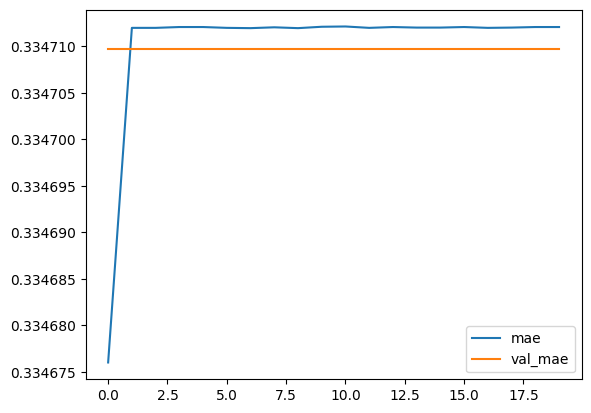

In [85]:
plt.plot(r.history['mae'], label='mae')
plt.plot(r.history['val_mae'], label='val_mae')
plt.legend()

In [79]:
# plt.plot(r.history['accuracy'], label='acc')
# plt.plot(r.history['val_accuracy'], label='val_acc')
# plt.legend()

In [80]:
# for i in range(len(masks)):
#     sss = (masks[i] * 255).astype('uint8')
#     cv2.imwrite(os.path.normpath( os.path.join(visualizations_dir, f"{i}_v.jpg")), sss)

In [81]:
pred= model.predict(x_val)

81/81 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step


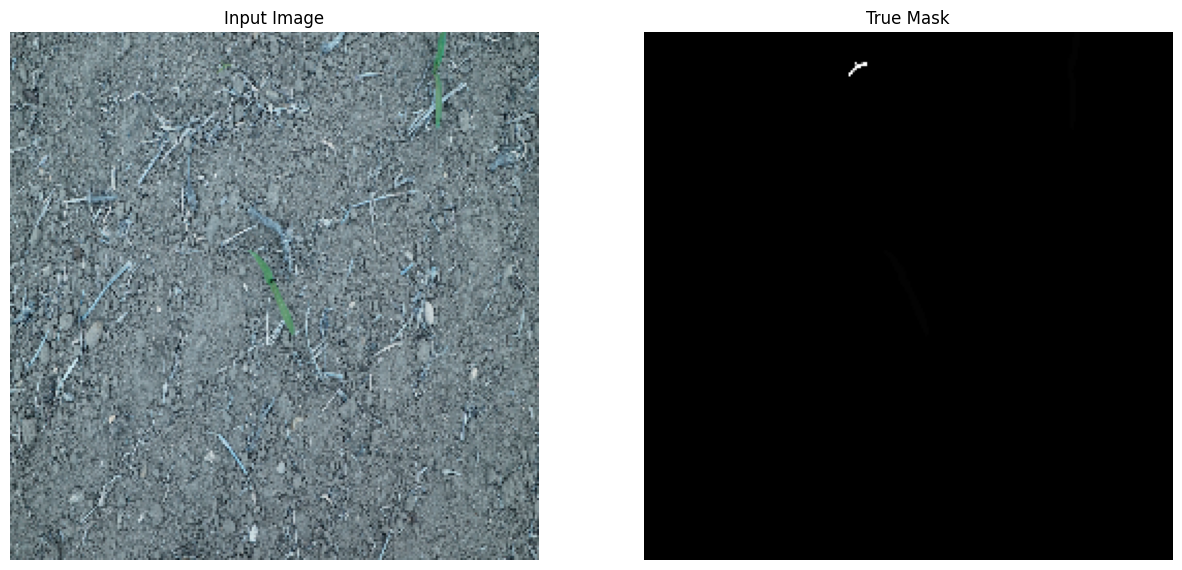

In [86]:
#Visualize
def display(display_list):
 plt.figure(figsize=(15, 15))
 title = ["Input Image", "True Mask", "Predicted Mask"]
 for i in range(len(display_list)):
   plt.subplot(1, len(display_list), i+1)
   plt.title(title[i])
   plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
   plt.axis("off")
 plt.show()

random_index = np.random.choice(len(x_train))
sample_image, sample_mask = x_train[random_index], y_train[random_index]
display([sample_image, sample_mask])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[[[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  ...

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]]]


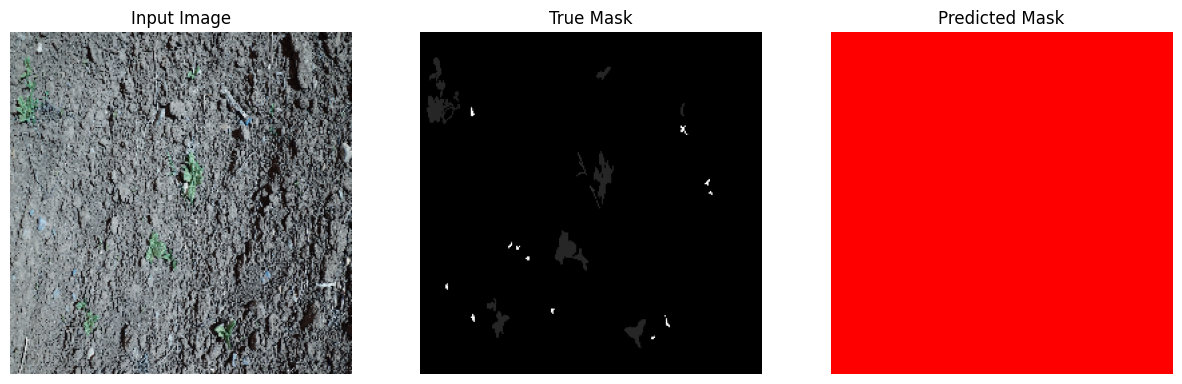

In [96]:
index = 675

x = np.expand_dims(images[index], axis=0)
pred_mask = model.predict(x)
print(pred_mask.astype('uint8')*255)
display([images[index], masks[index], pred_mask[0]])

In [84]:
# for i in range(len(pred)):
#     sss = (pred[i] * 255).astype('uint8')
#     cv2.imwrite(os.path.normpath( os.path.join(visualizations_dir, f"{i}_v.jpg")), sss)